# Exercice : dose map analysis

## Initialisation

Import modules. 
- matplotlib for plot
- numpy for matrix/vector numerical computation
- SimpleITK for image manipulation
- interact for slider

http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
from ipywidgets import interact
# to enable interactive widgets in jupyter notebook run this command in a terminal:
#jupyter nbextension enable --py widgetsnbextension

In [2]:
# Read a sitk image
img_ct = sitk.ReadImage('../data/patient-2mm.mhd')
print('Image size: ', img_ct.GetSize())
print('Image spacing: ', img_ct.GetSpacing())
print('Image origin: ', img_ct.GetOrigin())

('Image size: ', (126, 126, 111))
('Image spacing: ', (2.0, 2.0, 2.0))
('Image origin: ', (0.0, 0.0, 0.0))


In [3]:
# Convert sitk image to a numpy array
arr_ct = sitk.GetArrayFromImage(img_ct)
print('Array size: ', arr_ct.shape, ' <--- be careful to the dimension order!)')

('Array size: ', (111, 126, 126), ' <--- be careful to the dimension order!)')


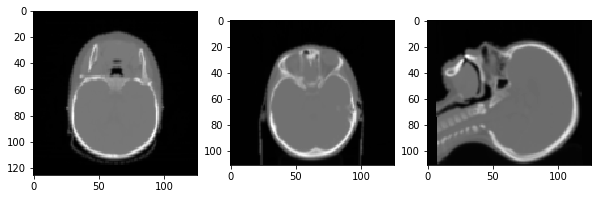

In [4]:
def show_ct(sx,sy,sz):
    fig, ax = plt.subplots(1,3, figsize=(10, 5))
    ax[0].imshow(arr_ct[sz,:,:], cmap=plt.cm.gray)
    ax[1].imshow(arr_ct[:,sx,:], cmap=plt.cm.gray)
    ax[2].imshow(arr_ct[:,:,sy], cmap=plt.cm.gray)
    
interact(show_ct, sx=(0,img_ct.GetSize()[0]), sy=(0,img_ct.GetSize()[1]), sz=(0,img_ct.GetSize()[2]));

In [5]:
img_dose = sitk.ReadImage('../output/3d-pat-Dose.mhd')
arr_dose = sitk.GetArrayFromImage(img_dose)
print('Image size = ', arr_dose.shape)
print('Image min and max: ',  np.amin(arr_dose), np.amax(arr_dose))

('Image size = ', (50, 50, 50))
('Image min and max: ', 0.0, 1.9134424e-08)


In [6]:
filter = sitk.RescaleIntensityImageFilter()
filter.SetOutputMaximum(1.0)
filter.SetOutputMinimum(0.0)
img_dose = filter.Execute(img_dose)

In [7]:
arr_dose = sitk.GetArrayFromImage(img_dose)
print('Image size = ', arr_dose.shape)
print('Image min and max: ',  np.amin(arr_dose), np.amax(arr_dose))

('Image size = ', (50, 50, 50))
('Image min and max: ', 0.0, 1.0)


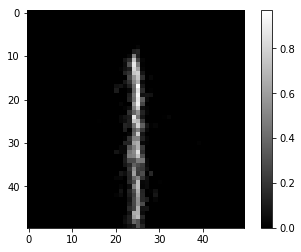

In [8]:
def show_dose(nslice):
    plt.imshow(arr_dose[:,nslice,:], cmap=plt.cm.gray)
    plt.colorbar()
    
interact(show_dose, nslice=(0,len(arr_dose)));

In [9]:
img_resampled_dose = sitk.Resample(img_dose, img_ct, sitk.Transform(), sitk.sitkLinear, 0)

In [10]:
arr_resampled_dose = sitk.GetArrayFromImage(img_resampled_dose)
print('Image size = ', arr_resampled_dose.shape)
print('Image min and max: ',  np.amin(arr_resampled_dose), np.amax(arr_resampled_dose))

('Image size = ', (111, 126, 126))
('Image min and max: ', 0.0, 0.82059324)


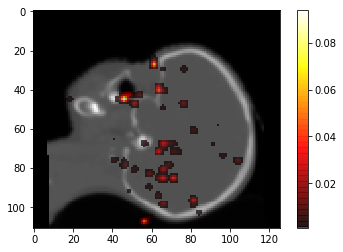

In [11]:
def show_fusion(nslice=50, opacity=0.7):
    plt.imshow(arr_ct[:,:,nslice], cmap=plt.cm.gray)
    a = arr_resampled_dose[:,:,nslice]
    b = np.ma.masked_where(a <= 0.001, a)
    plt.imshow(b, alpha=opacity, cmap=plt.cm.hot)
    plt.colorbar()
    
interact(show_fusion, nslice=(0,len(arr_ct)), opacity=(0,1,0.1));

Questions:
- plot a depth dose profile
- display uncertainty map
- create another simulation with a different beam angle, merge the two dose maps 
